<a href="https://colab.research.google.com/github/cromi0256/Study01/blob/main/15%EC%9E%A5_%EB%B9%84%EC%A7%80%EB%8F%84_%ED%95%99%EC%8A%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#15장 비지도 학습
#차원 축소, 군집화, 연관규칙 학습 등 타깃이 주어지지 않는 데이터 학습

In [2]:
#15-1 주성분 분석
import pandas as pd
from sklearn.datasets import load_wine
wine=load_wine()
X=pd.DataFrame(wine.data,columns=wine.feature_names)
y=pd.Series(wine.target,name='target')
print(X.head())

   alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0    14.23        1.71  2.43               15.6      127.0           2.80   
1    13.20        1.78  2.14               11.2      100.0           2.65   
2    13.16        2.36  2.67               18.6      101.0           2.80   
3    14.37        1.95  2.50               16.8      113.0           3.85   
4    13.24        2.59  2.87               21.0      118.0           2.80   

   flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   od280/od315_of_diluted_wines  proline  
0                  

In [3]:
#축소 전 데이터 표준화
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_s=scaler.fit_transform(X)
X_s=pd.DataFrame(X_s,columns=X.columns)
print(X_s.head())

    alcohol  malic_acid       ash  alcalinity_of_ash  magnesium  \
0  1.518613   -0.562250  0.232053          -1.169593   1.913905   
1  0.246290   -0.499413 -0.827996          -2.490847   0.018145   
2  0.196879    0.021231  1.109334          -0.268738   0.088358   
3  1.691550   -0.346811  0.487926          -0.809251   0.930918   
4  0.295700    0.227694  1.840403           0.451946   1.281985   

   total_phenols  flavanoids  nonflavanoid_phenols  proanthocyanins  \
0       0.808997    1.034819             -0.659563         1.224884   
1       0.568648    0.733629             -0.820719        -0.544721   
2       0.808997    1.215533             -0.498407         2.135968   
3       2.491446    1.466525             -0.981875         1.032155   
4       0.808997    0.663351              0.226796         0.401404   

   color_intensity       hue  od280/od315_of_diluted_wines   proline  
0         0.251717  0.362177                      1.847920  1.013009  
1        -0.293321  0.406051

In [4]:
#PCA적합
from sklearn.decomposition import PCA
pca=PCA(n_components=X.shape[1])  #특성 전체 입력
pca.fit(X_s)

#고유값 확인
summary=pd.DataFrame({'Eigenvalues':pca.explained_variance_,
                      'ev_ratio':pca.explained_variance_ratio_,
                      'cumsum':pca.explained_variance_ratio_.cumsum()},
                      index=[f'comp{i}' for i in range(1,X.shape[1]+1)])
print(summary)

        Eigenvalues  ev_ratio    cumsum
comp1      4.732437  0.361988  0.361988
comp2      2.511081  0.192075  0.554063
comp3      1.454242  0.111236  0.665300
comp4      0.924166  0.070690  0.735990
comp5      0.858049  0.065633  0.801623
comp6      0.645282  0.049358  0.850981
comp7      0.554141  0.042387  0.893368
comp8      0.350466  0.026807  0.920175
comp9      0.290512  0.022222  0.942397
comp10     0.252320  0.019300  0.961697
comp11     0.227064  0.017368  0.979066
comp12     0.169724  0.012982  0.992048
comp13     0.103962  0.007952  1.000000


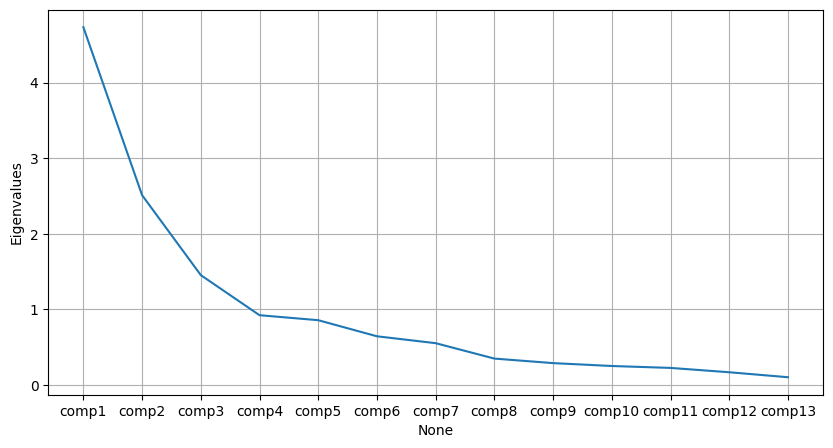

In [5]:
#시각화
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,5))
sns.lineplot(data=summary,x=summary.index,y='Eigenvalues')
plt.grid()
plt.show()

In [6]:
#차원죽소
model=PCA(n_components=6) #전체 분산의 85%를 설명하는 지점
model.fit(X_s)
result=model.transform(X_s)

e_vector=pd.DataFrame(model.components_,index=[f'comp{i}' for i in range(1,7)],
                      columns=X.columns)
print(e_vector)

        alcohol  malic_acid       ash  alcalinity_of_ash  magnesium  \
comp1  0.144329   -0.245188 -0.002051          -0.239320   0.141992   
comp2  0.483652    0.224931  0.316069          -0.010591   0.299634   
comp3 -0.207383    0.089013  0.626224           0.612080   0.130757   
comp4 -0.017856    0.536890 -0.214176           0.060859  -0.351797   
comp5 -0.265664    0.035214 -0.143025           0.066103   0.727049   
comp6  0.213539    0.536814  0.154475          -0.100825   0.038144   

       total_phenols  flavanoids  nonflavanoid_phenols  proanthocyanins  \
comp1       0.394661    0.422934             -0.298533         0.313429   
comp2       0.065040   -0.003360              0.028779         0.039302   
comp3       0.146179    0.150682              0.170368         0.149454   
comp4       0.198068    0.152295             -0.203301         0.399057   
comp5      -0.149318   -0.109026             -0.500703         0.136860   
comp6      -0.084122   -0.018920             -0.2585

In [7]:
#성능비교
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

X_train,X_test,y_train,y_test=train_test_split(X_s,y,stratify=y,random_state=0) #원본
lr=LogisticRegression()
lr.fit(X_train,y_train)
original_tr=lr.score(X_train,y_train)
original_te=lr.score(X_test,y_test)
print(f'original train score:{original_tr}')
print(f'original test score:{original_te}')

X_pca_train,X_pca_test,y_pca_train,y_pca_test=train_test_split(result,y,stratify=y,random_state=0) #축소
lr.fit(X_pca_train,y_pca_train)
print(f'pca train score:{lr.score(X_pca_train,y_pca_train)}')
print(f'pca test score:{lr.score(X_pca_test,y_pca_test)}')

original train score:1.0
original test score:1.0
pca train score:0.9924812030075187
pca test score:1.0


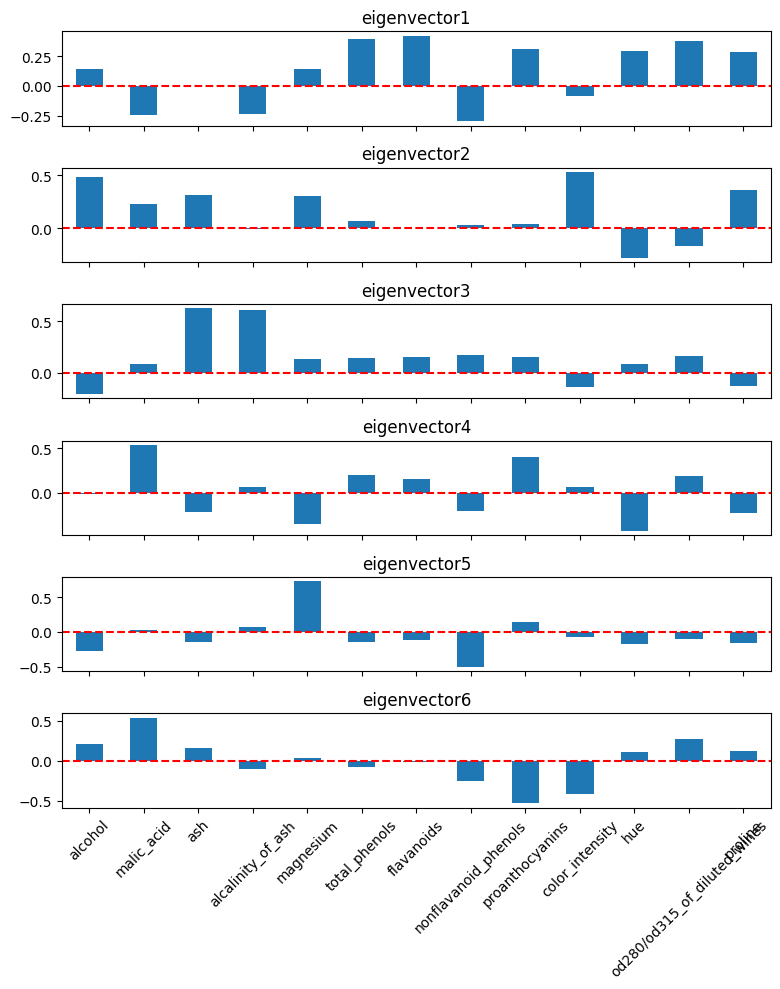

In [8]:
#고유벡터 시각화
fig,axes=plt.subplots(6,1,figsize=(8,10))
for i,ax in enumerate(axes):
  e_vector.iloc[i,:].plot.bar(ax=ax,rot=45)
  ax.set_title(f'eigenvector{i+1}')
  ax.axhline(y=0, color='r', linestyle='--')
  if i < len(axes) - 1:  # 마지막 subplot이 아니면
        ax.set_xticklabels([])  # x축 라벨 제거
plt.tight_layout()
plt.show()

In [9]:
#요인분석
from sklearn.decomposition import FactorAnalysis
fa=FactorAnalysis(n_components=6)
fa.fit(X_s)
result=fa.transform(X_s)
max_var=pd.DataFrame(fa.components_,index=[f'factor{i}' for i in range(1,7)],
                     columns=X.columns)
print(max_var)

          alcohol  malic_acid       ash  alcalinity_of_ash  magnesium  \
factor1 -0.011734    0.499023  0.054358           0.366881  -0.118080   
factor2  0.689838    0.056565  0.547437          -0.079816   0.439067   
factor3 -0.228345    0.153176  0.782987           0.609204   0.114059   
factor4  0.114401   -0.102151 -0.026376          -0.206579   0.709902   
factor5 -0.325482    0.112731 -0.066272           0.265444   0.279248   
factor6  0.237462    0.573977 -0.013557          -0.059723   0.001642   

         total_phenols  flavanoids  nonflavanoid_phenols  proanthocyanins  \
factor1      -0.772273   -0.890489              0.541279        -0.575860   
factor2       0.425996    0.363607             -0.126344         0.304027   
factor3      -0.074147   -0.045759              0.267223        -0.127566   
factor4      -0.113700   -0.112824             -0.170578        -0.047350   
factor5       0.076164    0.062117             -0.144900         0.280618   
factor6       0.027934   -

In [10]:
#성능비교
X_fa_train,X_fa_test,y_fa_train,y_fa_test=train_test_split(result,y,stratify=y,random_state=0) #축소
lr.fit(X_fa_train,y_fa_train)
print(f'fa train score:{lr.score(X_fa_train,y_fa_train)}')
print(f'fa test score:{lr.score(X_fa_test,y_fa_test)}')

fa train score:1.0
fa test score:1.0


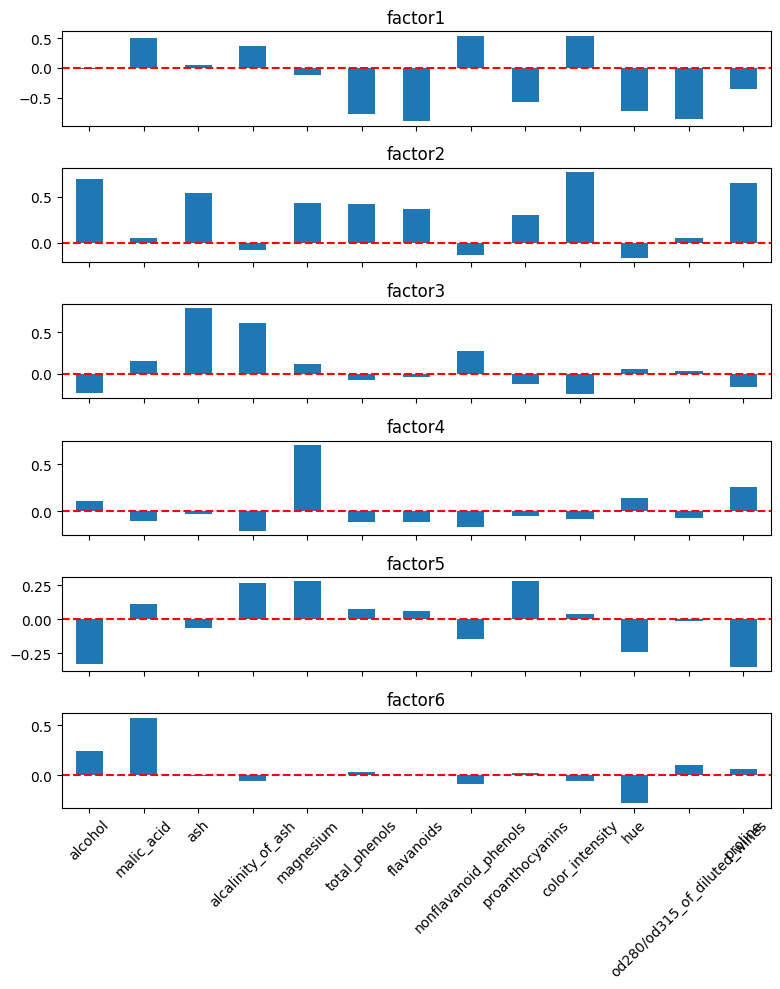

In [11]:
#시각화
fig,axes=plt.subplots(6,1,figsize=(8,10))
for i,ax in enumerate(axes):
  max_var.iloc[i,:].plot.bar(ax=ax,rot=45)
  ax.set_title(f'factor{i+1}')
  ax.axhline(y=0, color='r', linestyle='--')
  if i < len(axes) - 1:  # 마지막 subplot이 아니면
        ax.set_xticklabels([])  # x축 라벨 제거
plt.tight_layout()
plt.show()

In [12]:
#독립성분 분석
from sklearn.decomposition import FastICA
ind=FastICA(n_components=6)
ind.fit(X_s)
result=ind.transform(X_s)
ica=pd.DataFrame(ind.components_,index=[f'comp{i}' for i in range(1,7)],
                 columns=X.columns)
print(ica)

        alcohol  malic_acid       ash  alcalinity_of_ash  magnesium  \
comp1 -0.109203    0.063493  0.526437           0.499520   0.138156   
comp2  0.080814   -0.140959  0.013304          -0.118058   0.039590   
comp3  0.385304    0.285171  0.068488          -0.150729   0.084326   
comp4 -0.147051    0.382303 -0.316751           0.079772  -0.218637   
comp5  0.117075    0.709133  0.149768          -0.029535   0.176087   
comp6  0.282367    0.220202  0.132329          -0.053595  -0.837830   

       total_phenols  flavanoids  nonflavanoid_phenols  proanthocyanins  \
comp1       0.145621    0.128330              0.163378         0.204375   
comp2       0.180625    0.193372             -0.100455         0.119947   
comp3       0.023680   -0.012747             -0.072626        -0.069275   
comp4       0.188128    0.138635             -0.255916         0.565161   
comp5      -0.095178   -0.008343             -0.455707        -0.514917   
comp6       0.174862    0.141885              0.4088

In [13]:
#성능비교
X_ica_train,X_ica_test,y_ica_train,y_ica_test=train_test_split(result,y,stratify=y,random_state=0) #축소
lr.fit(X_ica_train,y_ica_train)
print(f'ica train score:{lr.score(X_ica_train,y_ica_train)}')
print(f'ica test score:{lr.score(X_ica_test,y_ica_test)}')

ica train score:0.9849624060150376
ica test score:1.0


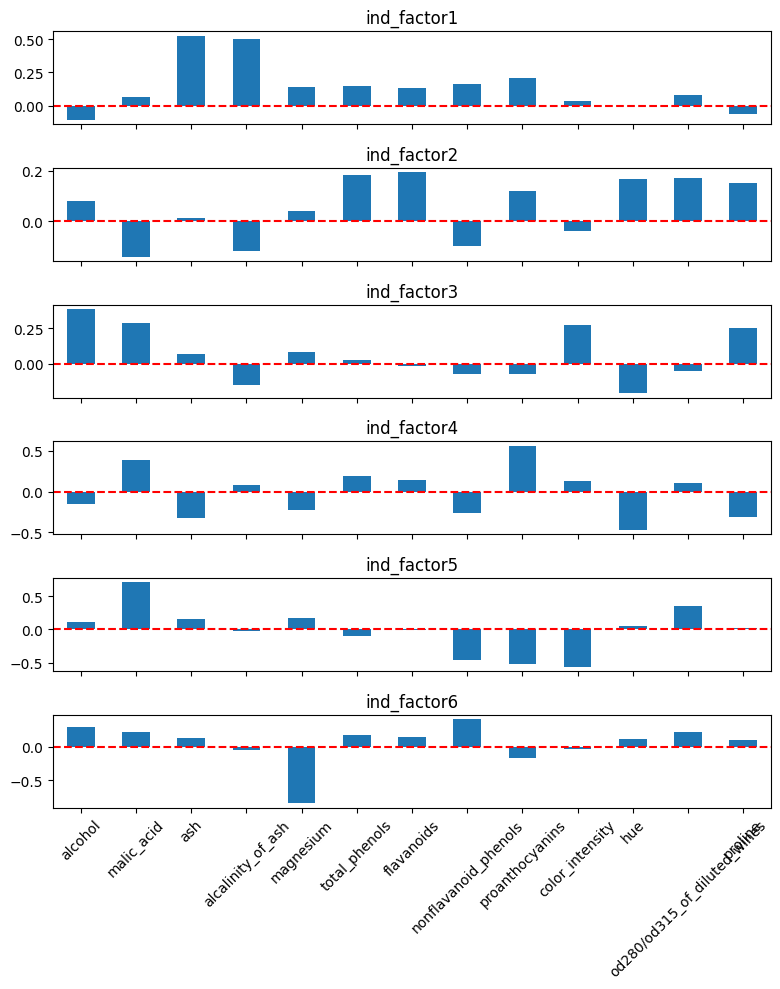

In [14]:
#시각화
fig,axes=plt.subplots(6,1,figsize=(8,10))
for i,ax in enumerate(axes):
  ica.iloc[i,:].plot.bar(ax=ax,rot=45)
  ax.set_title(f'ind_factor{i+1}')
  ax.axhline(y=0, color='r', linestyle='--')
  if i < len(axes) - 1:  # 마지막 subplot이 아니면
        ax.set_xticklabels([])  # x축 라벨 제거
plt.tight_layout()
plt.show()

In [15]:
#음수를 표현할수 없으므로 정규화 진행
from sklearn.preprocessing import Normalizer
scaler=Normalizer()
X_n=scaler.fit_transform(X)
X_n=pd.DataFrame(X_n,columns=X.columns)

#음수 미포함 행렬 분해
from sklearn.decomposition import NMF
nmf=NMF(n_components=6)
nmf.fit(X_n)
nmf_result=nmf.transform(X_n)
nmf_df=pd.DataFrame(nmf.components_,index=[f'nmf_factor{i}' for i in range(1,7)],
                    columns=X.columns)
nmf_df.head()

/usr/local/lib/python3.11/dist-packages/sklearn/decomposition/_nmf.py:1741: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
nmf_factor1,0.023343,0.002297,0.004636,0.024090,0.240873,0.004348,0.003311,0.000460,0.003035,0.012907,0.001648,0.004046,3.725474
nmf_factor2,0.108119,0.008759,0.025755,0.196820,2.192542,0.015324,0.007647,0.001741,0.012925,0.000000,0.011643,0.015162,0.000000
nmf_factor3,1.125366,0.871715,0.204796,2.272312,5.796494,0.053476,0.000000,0.056851,0.047166,0.000000,0.033899,0.130796,0.000000
nmf_factor4,0.372289,0.020498,0.051471,0.537183,0.707728,0.033531,0.000000,0.014107,0.016140,0.680401,0.000000,0.000000,0.000000
nmf_factor5,0.244728,0.034236,0.013471,0.062880,0.117362,0.063718,0.074619,0.003073,0.039001,0.023615,0.023413,0.081547,0.000000


In [16]:
#성능비교
X_nmf_train,X_nmf_test,y_nmf_train,y_nmf_test=train_test_split(nmf_result,y,stratify=y,random_state=0) #축소
lr.fit(X_nmf_train,y_nmf_train)
print(f'nmf train score:{lr.score(X_nmf_train,y_nmf_train)}')
print(f'nmf test score:{lr.score(X_nmf_test,y_nmf_test)}')

nmf train score:0.39849624060150374
nmf test score:0.4


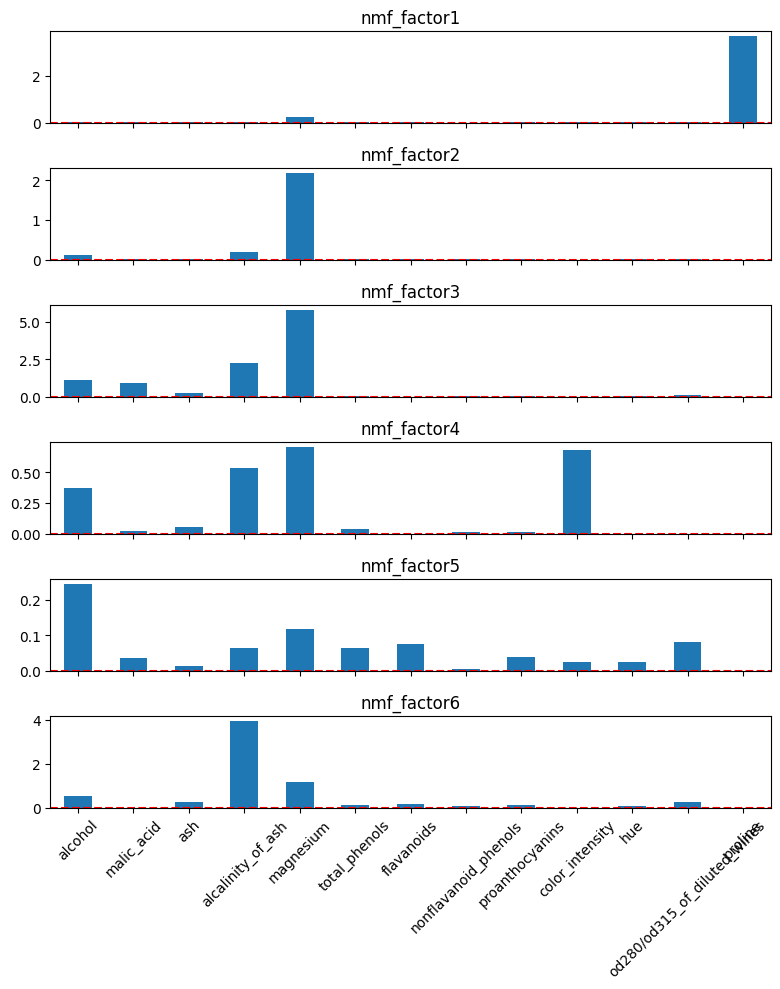

In [17]:
#시각화
fig,axes=plt.subplots(6,1,figsize=(8,10))
for i,ax in enumerate(axes):
  nmf_df.iloc[i,:].plot.bar(ax=ax,rot=45)
  ax.set_title(f'nmf_factor{i+1}')
  ax.axhline(y=0, color='r', linestyle='--')
  if i < len(axes) - 1:  # 마지막 subplot이 아니면
        ax.set_xticklabels([])  # x축 라벨 제거
plt.tight_layout()
plt.show()

#모델 성능


In [18]:
#15-2 군집분석:공통된 패턴을 감지하여 군집 생성
#15-2-1 계층적 군집분석: 군집수를 미리 정하지 않음
#합병형 군집분석
import numpy as np
from scipy.cluster.hierarchy import linkage,dendrogram,cut_tree
from sklearn.datasets import load_iris
iris=load_iris()
X=pd.DataFrame(iris.data,columns=iris.feature_names)
y=pd.Series(iris.target,name='target')

#거리를 기반으로 하기에 표준화가 필요
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
X_s=ss.fit_transform(X)
df=pd.DataFrame(X_s,columns=X.columns)
print(df.head())

#군집화 매트릭스
Z=linkage(df,method='ward') #single, complete, average,weighted, centroid, median, ward
print(Z[:3,:].round())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0          -0.900681          1.019004          -1.340227         -1.315444
1          -1.143017         -0.131979          -1.340227         -1.315444
2          -1.385353          0.328414          -1.397064         -1.315444
3          -1.506521          0.098217          -1.283389         -1.315444
4          -1.021849          1.249201          -1.340227         -1.315444
[[101. 142.   0.   2.]
 [  7.  39.   0.   2.]
 [ 10.  48.   0.   2.]]


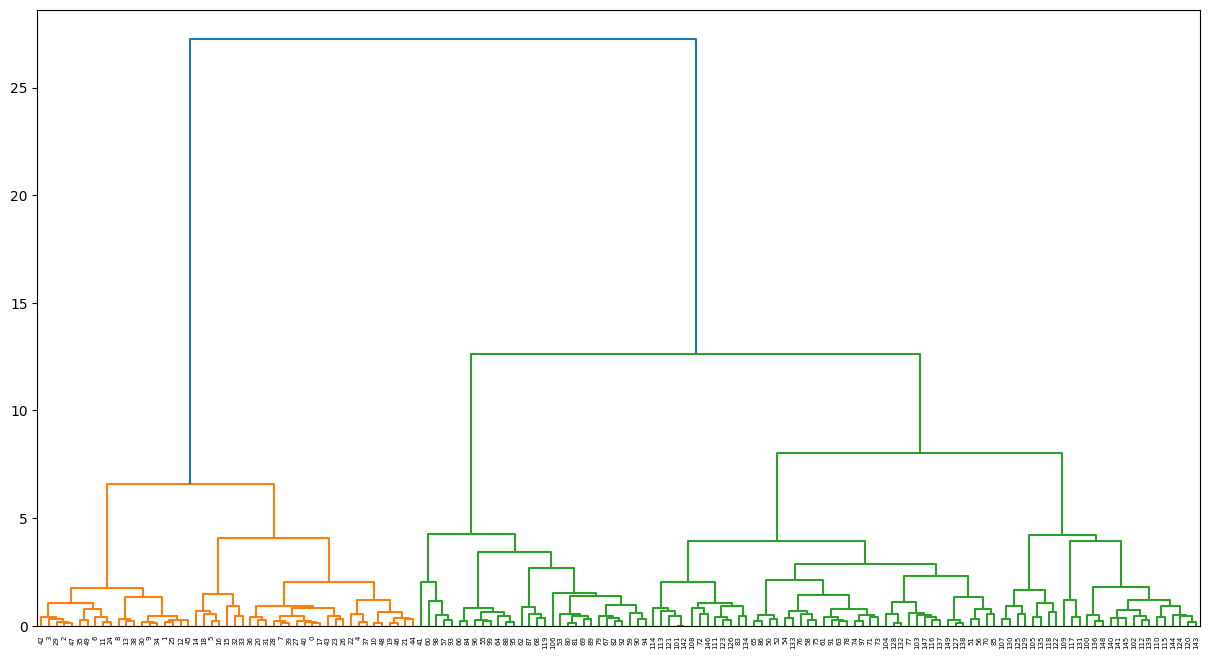

In [19]:
#군집 시각화
fig,ax=plt.subplots(figsize=(15,8))
dendrogram(Z)
plt.show()

In [20]:
#군집 반환
n_cluster=3
cluster=cut_tree(Z,n_clusters=n_cluster).flatten()
print(cluster)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 0 0 0 0 0 0 0 0 2 2 2 1 2 1 2 1 2 1 1 2 1 2 1 2 1 1 1 1 2 2 2 2
 2 2 2 2 2 1 1 1 1 2 1 2 2 1 1 1 1 2 1 1 1 1 1 2 1 1 2 2 2 2 2 2 1 2 2 2 2
 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [21]:
#군집 평가
from sklearn.metrics import silhouette_score
print(silhouette_score(df,cluster))

0.4466890410285909


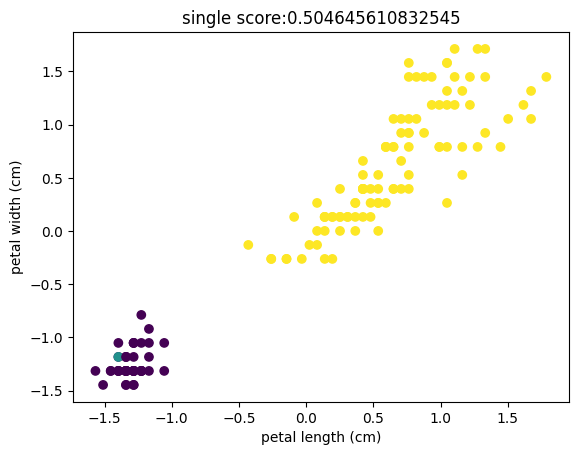

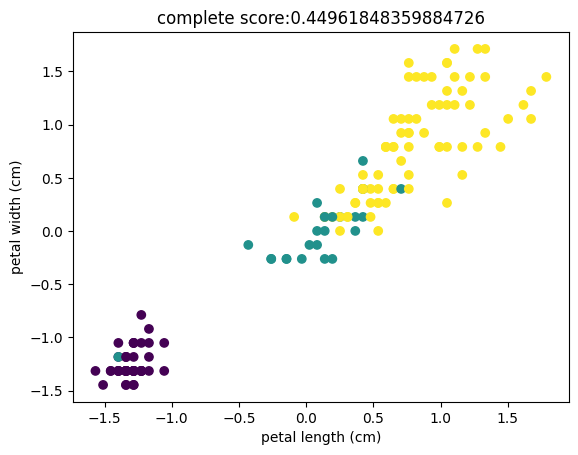

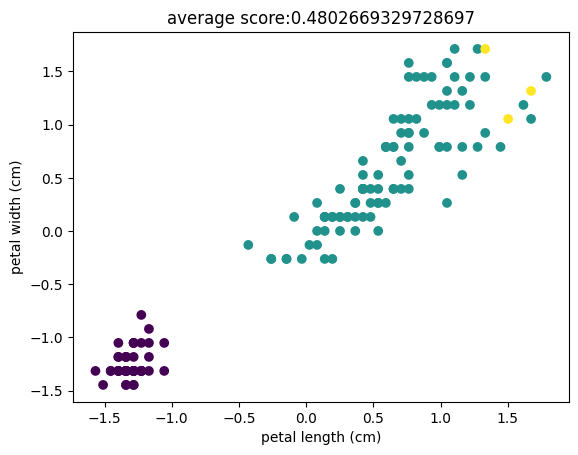

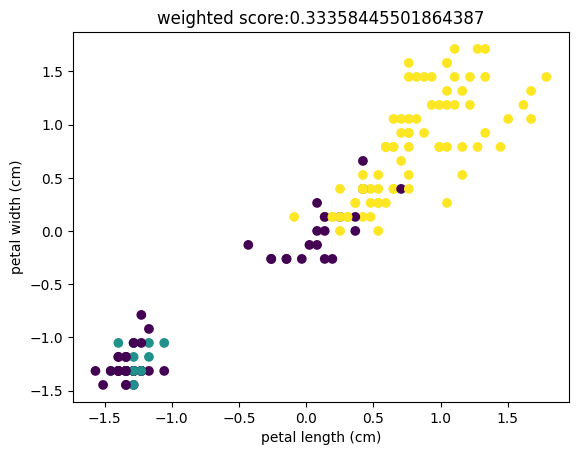

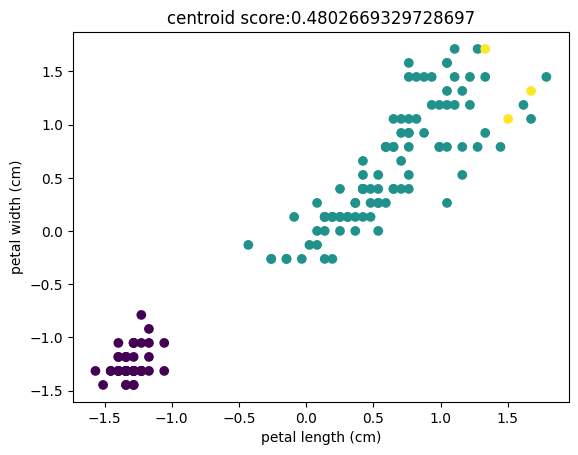

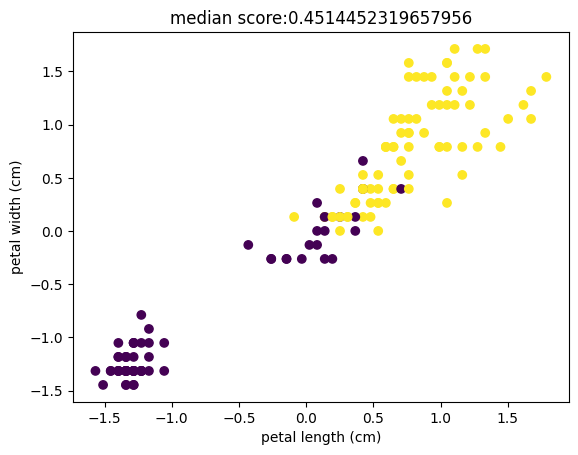

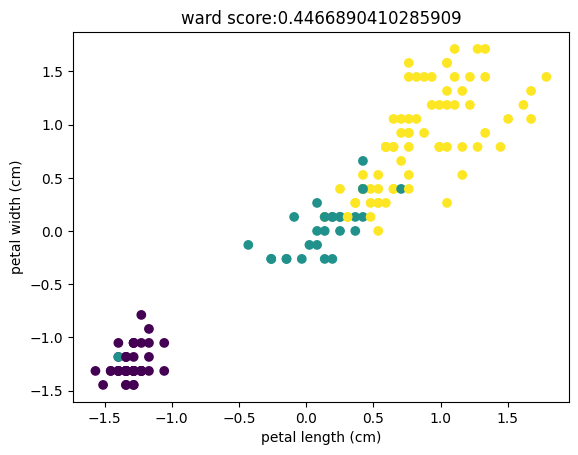

In [22]:
#측정 지표 별 군집 평가
methods=['single','complete','average','weighted','centroid','median','ward']
for method in methods:
  Z=linkage(df,method=method)
  cluster=cut_tree(Z,n_clusters=3).flatten()
  score=silhouette_score(df,cluster)
  plt.scatter(df.iloc[:,2],df.iloc[:,3],c=cluster)
  plt.xlabel(df.columns[2])
  plt.ylabel(df.columns[3])
  plt.title(f'{method} score:{score}')
  plt.show()
#점수는 single이 높으나 시각적으로 complete나 ward방법이 설득력이 있어보인다

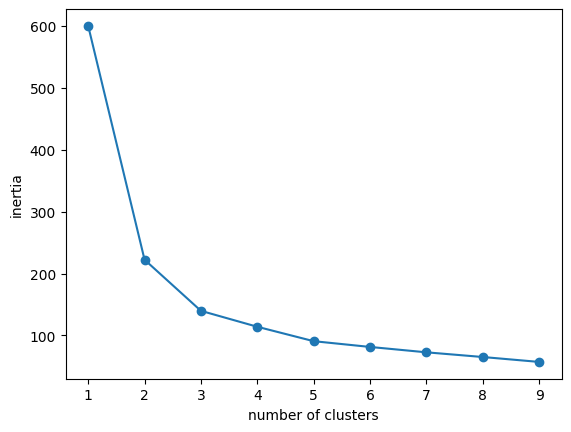

In [23]:
#15-2-2 비계층적 군집 분석
#K-means 군집화
from sklearn.cluster import KMeans

#elbow 지점 시각화
I=[]
for k in range(1,10): #9개 군집까지 생성
  km=KMeans(n_clusters=k,random_state=0).fit(df)
  I.append(km.inertia_) #오차제곱합
plt.plot(list(range(1,10)),I,marker='o')
plt.xlabel('number of clusters')
plt.ylabel('inertia')
plt.show()
#3개의 군집이 적절해 보인다

In [24]:
#군집 반환
n_cluster=3
model=KMeans(n_clusters=n_cluster,random_state=0)
cluster=model.fit_predict(df)
print(cluster)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 0 0 0 2 0 0 0 0 0 0 0 0 2 0 0 0 0 2 0 0 0
 0 2 2 2 0 0 0 0 0 0 0 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 2 2 2 2 2 2 0 0 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]


In [25]:
#군집 정보
centers=pd.DataFrame(model.cluster_centers_,columns=df.columns,index=[f'cluster{i}' for i in range(1,n_cluster+1)])
print(centers)

          sepal length (cm)  sepal width (cm)  petal length (cm)  \
cluster1          -0.050220         -0.883376           0.347738   
cluster2          -1.014579          0.853263          -1.304987   
cluster3           1.135970          0.088422           0.996155   

          petal width (cm)  
cluster1          0.281527  
cluster2         -1.254893  
cluster3          1.017526  


In [26]:
#타당성 평가
print('실루엣 계수:',silhouette_score(df,cluster))
print('원본 실루엣 계수:',silhouette_score(df,y))

실루엣 계수: 0.45994823920518635
원본 실루엣 계수: 0.3811261580543803


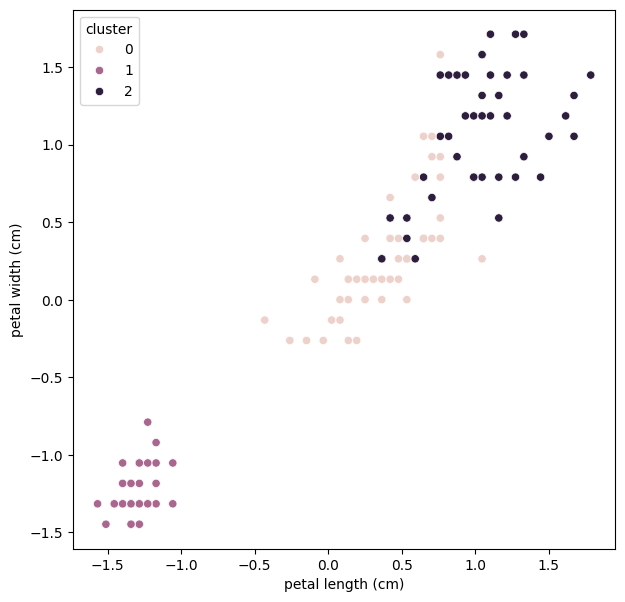

In [27]:
#군집 시각화
df['cluster']=cluster
fig,ax=plt.subplots(figsize=(7,7))
sns.scatterplot(data=df,x=df.columns[2],y=df.columns[3],hue='cluster')
plt.show()

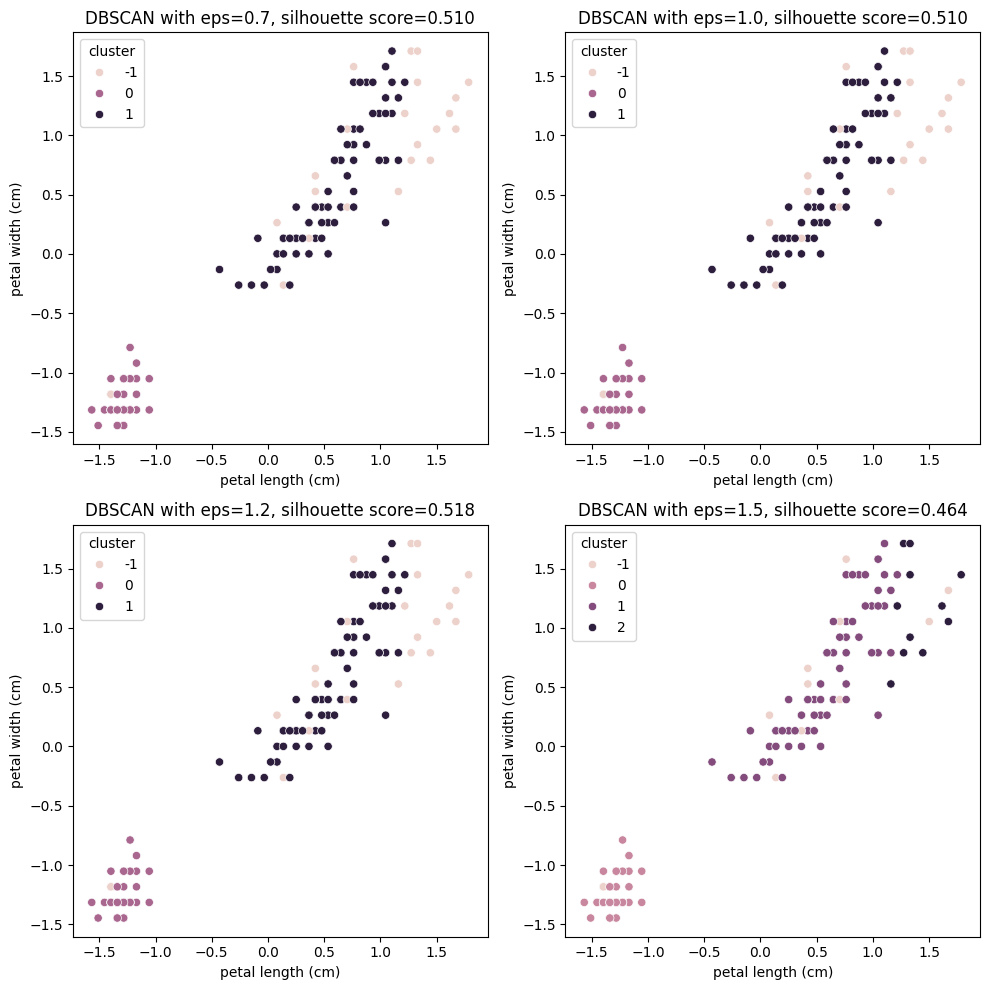

In [40]:
#DBSCAN
from sklearn.cluster import DBSCAN
import seaborn as sns
import matplotlib.pyplot as plt

# 적정한 eps 찾기
eps_list = [0.7, 1.0, 1.2, 1.5]
fig, axes = plt.subplots(2, 2, figsize=(10, 10))

# 2x2 형태의 axes를 1D로 펼치기
axes = axes.ravel()

for ax, eps in zip(axes, eps_list):
    db = DBSCAN(eps=eps, min_samples=10).fit(df)
    df['cluster'] = db.labels_
    sns.scatterplot(data=df, x=df.columns[2], y=df.columns[3], hue='cluster', ax=ax)
    score = silhouette_score(df, db.labels_)
    ax.set_title(f'DBSCAN with eps={eps}, silhouette score={score:.3f}')

plt.tight_layout()
plt.show()
#군집조건(eps,min_samples)을 충족하지 않으면 -1로 분류된다

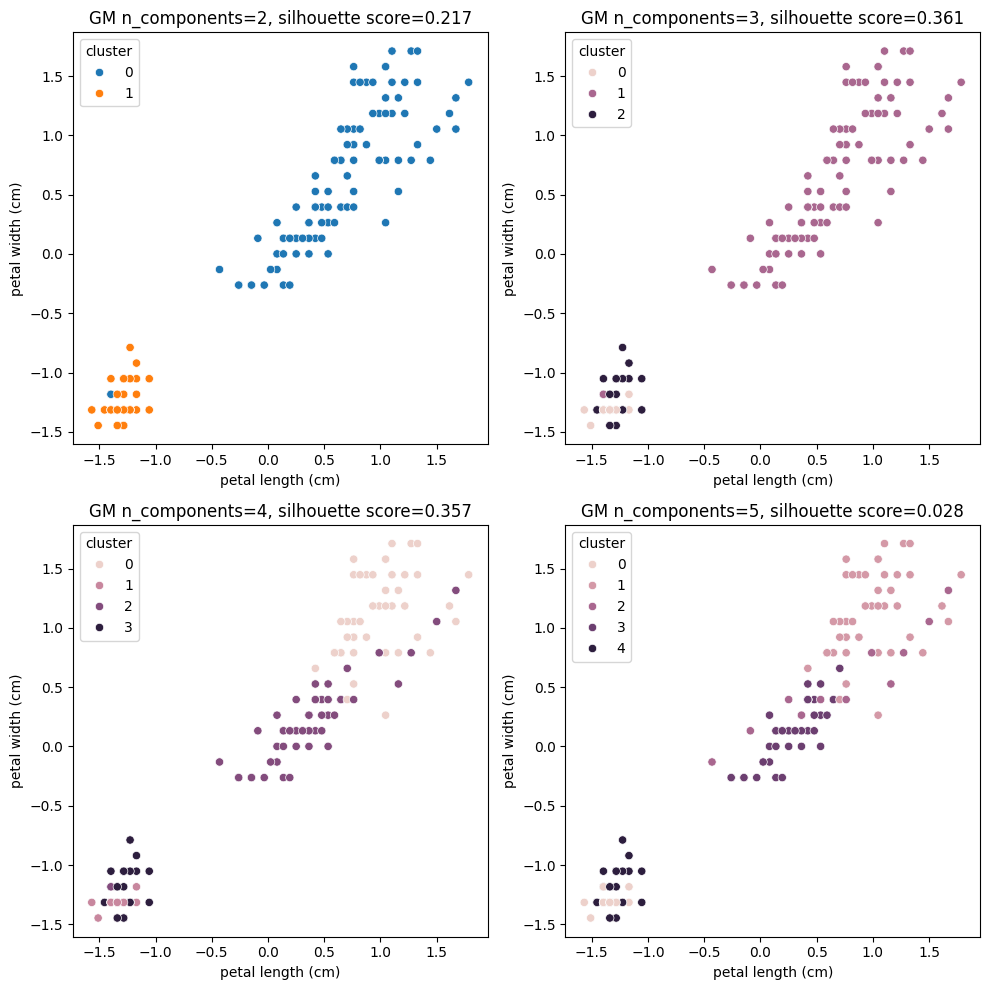

In [43]:
#혼합분포군집:분포를 기반으로 군집생성
from sklearn.mixture import GaussianMixture
dist_list=[2,3,4,5]
fig,axes=plt.subplots(2,2,figsize=(10,10))
axes=axes.ravel()

for ax,k in zip(axes,dist_list):
  gm=GaussianMixture(n_components=k).fit(df)
  df['cluster']=gm.predict(df)
  sns.scatterplot(data=df,x=df.columns[2],y=df.columns[3],hue='cluster',ax=ax)
  score=silhouette_score(df,gm.predict(df))
  ax.set_title(f'GM n_components={k}, silhouette score={score:.3f}')
plt.tight_layout()
plt.show()

In [ ]:
#15-3 연관규칙학습
#mlxtend사용